# **SW03: Preprocessing**

In the following, we demonstrate some preprocessing methods for the Titanic 
dataset. The dataset contains the following data about the passengers:

- Passenger ID - Unique identifier of the passenger
- Survived - Did they survive or not? (Target variable)
- P Class - The class of the ticket (1st, 2nd, 3rd)
- Name - Name of the passenger
- Sex - Sex of the passenger (male, female)
- Age - Age of passenger (in years)
- SibSp - Number of siblings or spouse(s) aboard
- Parch - Parent or child aboard
- Ticket - Ticket identifier
- Fare - Amount paid for the ticket
- Cabin - Cabin of residence (if available)
- Embarked - Point of embarkment (C = Cherbourg, Q = Queenstown, S = Southampton)


Based on this data, the goal is to develop a model that predicts whether a
passenger survived or not.

You will see that a logistic regression classifier is able to predict the 
survival of a passanger with a success rate of 0.781. 

However, there's a lot to improve in the data... Do you manage to achieve a better score?

---

In [8]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import ml

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Load titanic dataset
df = pd.read_csv('../data/datasets/titanic.csv', sep=',')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Drop uninformative columns**

Some columns are not important for the classification, as they are unique 
for each passenger and therefore not informative for the classification: 
PassengerId, Name, Ticket.

Let's drop this features from the dataframe.

In [10]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns_to_drop, axis=1)
display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


## **Handling of Missing Values**

In [11]:
# We can use df.info() to see which columns contain NaN values. We see that
# the columns 'Age', 'Cabin' and 'Embarked' contain missing values. 
print("######################################")
df.info()
print("######################################\n")

# Check which rows contain NaN values (NaN = Not a Number)
row_has_nan = pd.isnull(df).any(axis=1)
print(f'Number of rows that contain at least one NaN value: {sum(row_has_nan)}')

# We can use row_has_nan to drop these rows from the dataframe 
# Remember: ~mask inverts a boolean mask: True -> False, False -> True
df_clean = df[~row_has_nan]

print(f'Number of rows before cleaning: {len(df)}')
print(f'Number of rows after cleaning: {len(df_clean)}')

######################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
######################################

Number of rows that contain at least one NaN value: 708
Number of rows before cleaning: 891
Number of rows after cleaning: 183


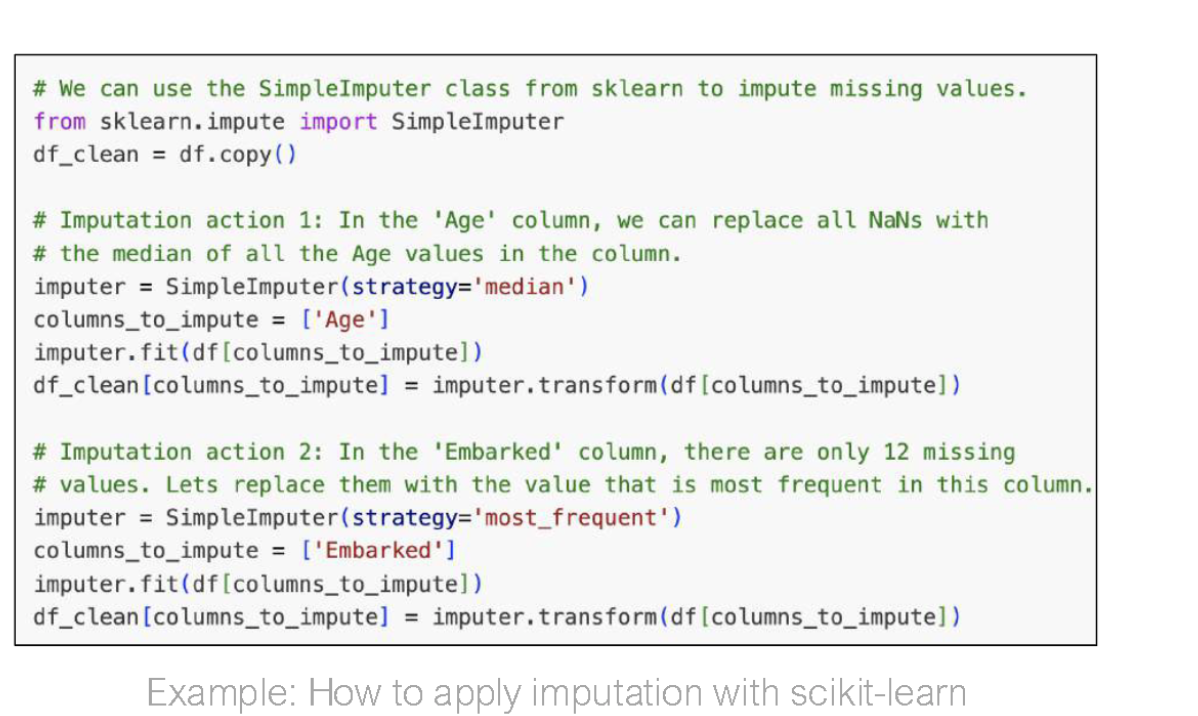

In [13]:
######################
###   EXERCISE 1   ###
######################

# After cleaning the dataset, we see that there are only 183 remaining rows.
# Most of our data got lost in the process! Can you improve the result of the
# classifier with imputation?






0

## **Separate target variable**

In [100]:
# The column "Survived" contains our target values, we should thus 
# remove it from the dataframe and store it in a separate variable y.
y = df_clean['Survived']
df_clean = df_clean.drop(['Survived'], axis=1)

# Exercise: What is the difference between df['Survived'] and df[['Survived']]?
# Solution: df['Survived'] returns a pandas Series, while 
#           df[['Survived']] returns a DataFrame with one column.

## **Encoding of Categorical Data**

In [101]:
# Now we want to one-hot-encode the columns that are not yet numeric, 
# because our machine learning classifiers can only handle numeric data.
# categorical_columns = ['Sex', 'Cabin', 'Embarked']
categorical_columns = ['Sex', 'Embarked', 'Cabin']

# For this we split the dataframe into data that is already numeric and 
# data that has to be encoded: 
df_categorical = df_clean[categorical_columns]
df_numeric = df_clean.drop(categorical_columns, axis=1)


In [102]:
######################
###   EXERCISE 2   ###
######################

# Use the OneHotEncoder from sklearn to encode the categorical columns.
df_categorical_encoded = ...


## **Normalize the numeric data**

In [103]:
df_numeric

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [104]:
######################
###   EXERCISE 3   ###
######################

# The numeric data in the dataframe df_numeric is not yet normalized. This can
# lead to problems when training machine learning models and affect the 
# predictive performance of the model. Apply one of the scaling methods 
# we discussed to normalize (or standardize) the data. Does it help to improve
# the performance of the model?






## **Merge categorical and numeric data**

In [6]:
# We have now preprocessed the categorical and numeric data.
# Let's merge this data back together.
X = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)
X

NameError: name 'df_numeric_scaled' is not defined

## **Model training and evaluation**

Using the preprocessed data, let's train a logistic regression model.

To properly evaluate the performance of our model, we split the data into a
training and a test set. We want to use 30% of the data for testing and the 
rest for training.

In [16]:
######################
###   EXERCISE 4   ###
######################

# Train a logistic regression model on the data and evaluate its performance.
# Apply the following steps:
#   - Split the data into a training and a test set (70% training, 30% test)
#   - Train the logistic regression model on the training set
#   - Predict the target values on the test set
#   - Evaluate the performance of the model using the accuracy_score()
#     function from sklearn.metrics.
#
# Report the accuarcy of the model.